#### Data Loading and Exploration 

##### Import required libraries

In [1]:
###basic python librarries 
import os      ###for folder path operation 
import warnings           #to ignore warning message
warnings.filterwarnings('ignore')


In [2]:
## Data Manipulation and analysis
import pandas as pd
import numpy as np

In [3]:
#### Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#### Exploratory Data Analysis
#statistical summary 
from scipy import stats 
from scipy.stats import skew,kurtosis


In [5]:
##display setting
pd.set_option('display.max_columns',None)
pd.set_option('display.width',1000)

In [6]:
## my sql connector
import mysql.connector
from sqlalchemy import create_engine

In [7]:
print("Finally every required libraries are imported")

Finally every required libraries are imported


#### Load all csv files

In [8]:
Folder_path=r"C:\Users\Asus\OneDrive\Desktop\LinkedIn Job Insights (2023–24)_project(mysql,etl,power bi)\data"

In [40]:
companies=pd.read_csv(os.path.join(Folder_path,"companies.csv"))
company_industry=pd.read_csv(os.path.join(Folder_path,"company_industries.csv"))
company_specialities=pd.read_csv(os.path.join(Folder_path,"company_specialities.csv"))
employee_counts=pd.read_csv(os.path.join(Folder_path,"employee_counts.csv"))
industries=pd.read_csv(os.path.join(Folder_path,"industries.csv"))
job_industries=pd.read_csv(os.path.join(Folder_path,"job_industries.csv"))
job_skills=pd.read_csv(os.path.join(Folder_path,"job_skills.csv"))
postings=pd.read_csv(os.path.join(Folder_path,"postings.csv"))
salaries=pd.read_csv(os.path.join(Folder_path,"salaries.csv"))
benefits=pd.read_csv(os.path.join(Folder_path,"benefits.csv"))

NameError: name 'os' is not defined

#### Basic Explorartory Data Analyst( Check structure of each dataset)

In [10]:
for name,df in {
    "Companies":companies,
    "Company_industry":company_industry,
    "Company_specialities":company_specialities,
    "Employee_counts":employee_counts,
    "Industries":industries,
    "Job_industries":job_industries,
    "Job_skills":job_skills,
    "Postings":postings,
    "Salaries":salaries,
    "Benefits":benefits
}.items():
    print(f"---{name}---")
    print(df.shape)                  # No. of rows/columns
    print(df.isnull().sum())          # Missing values
    print(df.columns)               # name of columns
    print()

---Companies---
(24473, 10)
company_id         0
name               1
description      297
company_size    2774
state             22
country            0
city               1
zip_code          28
address           22
url                0
dtype: int64
Index(['company_id', 'name', 'description', 'company_size', 'state', 'country', 'city', 'zip_code', 'address', 'url'], dtype='object')

---Company_industry---
(24375, 2)
company_id    0
industry      0
dtype: int64
Index(['company_id', 'industry'], dtype='object')

---Company_specialities---
(169387, 2)
company_id    0
speciality    0
dtype: int64
Index(['company_id', 'speciality'], dtype='object')

---Employee_counts---
(35787, 4)
company_id        0
employee_count    0
follower_count    0
time_recorded     0
dtype: int64
Index(['company_id', 'employee_count', 'follower_count', 'time_recorded'], dtype='object')

---Industries---
(422, 2)
industry_id       0
industry_name    34
dtype: int64
Index(['industry_id', 'industry_name'], dtype='ob

In [11]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24473 entries, 0 to 24472
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_id    24473 non-null  int64  
 1   name          24472 non-null  object 
 2   description   24176 non-null  object 
 3   company_size  21699 non-null  float64
 4   state         24451 non-null  object 
 5   country       24473 non-null  object 
 6   city          24472 non-null  object 
 7   zip_code      24445 non-null  object 
 8   address       24451 non-null  object 
 9   url           24473 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.9+ MB


In [12]:
###he company_size column is numeric, but it actually represents an
###ordinal/categorical scale (1–7), so there was no need to check for
###standardized the categories

In [13]:
# Fill missing values
companies['name'].fillna('Unknown', inplace=True)
companies['description'].fillna('Not Provided', inplace=True)
companies['company_size'].fillna(companies['company_spize'].mode()[0], inplace=True)  # Fill with mode
companies['state'].fillna('Unknown', inplace=True)
companies['city'].fillna('Unknown', inplace=True)
companies['zip_code'].fillna('Unknown', inplace=True)
companies['address'].fillna('Unknown', inplace=True)

In [14]:
## check missing value  after filling 
print(companies.isnull().sum())

company_id      0
name            0
description     0
company_size    0
state           0
country         0
city            0
zip_code        0
address         0
url             0
dtype: int64


In [15]:
# handle duplication if exists
companies.duplicated().sum()

0

In [16]:
### next table
company_industry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24375 entries, 0 to 24374
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   company_id  24375 non-null  int64 
 1   industry    24375 non-null  object
dtypes: int64(1), object(1)
memory usage: 381.0+ KB


In [17]:
##there is no numeric col so we don't need to check further details and no null values

In [18]:
## handle duplicated
company_industry.duplicated().sum()

0

In [19]:
### next one
company_specialities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169387 entries, 0 to 169386
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   company_id  169387 non-null  int64 
 1   speciality  169387 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.6+ MB


In [20]:
### no mumeric colss nd null value

In [21]:
### handle duplicated 
company_specialities.duplicated().sum()

0

In [22]:
### go to next one
employee_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35787 entries, 0 to 35786
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   company_id      35787 non-null  int64
 1   employee_count  35787 non-null  int64
 2   follower_count  35787 non-null  int64
 3   time_recorded   35787 non-null  int64
dtypes: int64(4)
memory usage: 1.1 MB


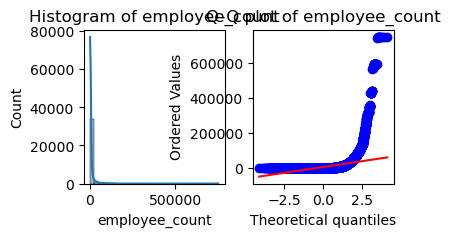

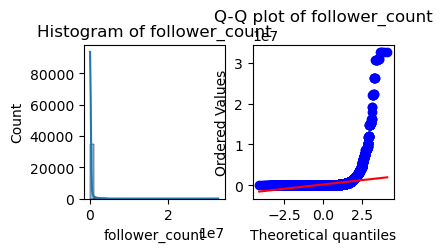

In [23]:
## normality check for (epmployee_count and follower_count)
numeric_colls=['employee_count','follower_count']
for col in numeric_colls:
    plt.figure(figsize=(4,2))
    
    plt.subplot(1,2,1)
    sns.histplot(employee_counts[col],kde=True,bins=30)
    plt.title(f"Histogram of {col}")

    plt.subplot(1,2,2)
    stats.probplot(employee_counts[col].dropna(), dist="norm" , plot=plt)
    plt.title(f"Q-Q plot of {col}")

    plt.show()

In [24]:
##statistical check (descriptive stats)
employee_counts[['employee_count','follower_count']].describe()


,employee_count,follower_count
count,35787.000000,3.578700e+04
mean,6715.874256,2.012616e+05
std,29400.984643,1.114733e+06
min,0.000000,0.000000e+00
25%,56.000000,2.738000e+03
50%,418.000000,1.617800e+04
75%,2945.000000,7.412950e+04
max,751125.000000,3.270284e+07


In [25]:
#### Outlier Detection (based on IQR Method)
for col in numeric_colls:
    Q1=employee_counts[col].quantile(0.25)
    Q3=employee_counts[col].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper= Q3 + 1.5*IQR
    outliers=employee_counts[(employee_counts[col]<lower) | (employee_counts[col]>upper)]
    print(f"{col}:{len(outliers)} outliers")

employee_count:5417 outliers
follower_count:5205 outliers


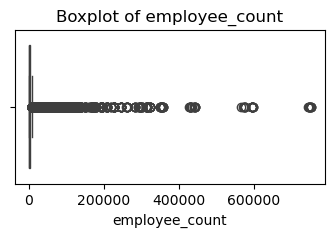

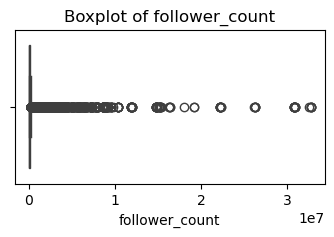

In [26]:
###outlier visual
for col in numeric_colls:
    plt.figure(figsize=(4,2))
    sns.boxplot(x=employee_counts[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [27]:
for col in numeric_colls:
    Q1= employee_counts[col].quantile(0.25)
    Q3=employee_counts[col].quantile(0.75)
    IQR=Q3-Q1
    lower= Q1 - 1.5*IQR
    upper= Q3 + 1.5*IQR
    employee_counts[col]=np.where(employee_counts[col]<lower,lower,employee_counts[col])
    employee_counts[col]=np.where(employee_counts[col]>upper,upper,employee_counts[col])

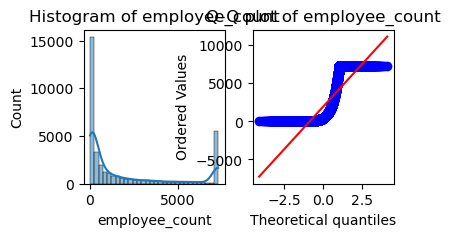

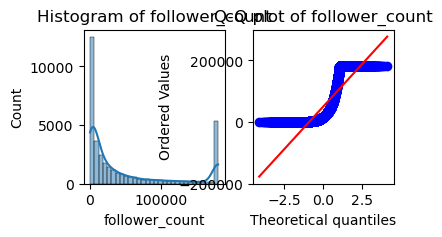

In [28]:
### check again
numeric_colls=['employee_count','follower_count']
for col in numeric_colls:
    plt.figure(figsize=(4,2))
    
    plt.subplot(1,2,1)
    sns.histplot(employee_counts[col],kde=True,bins=30)
    plt.title(f"Histogram of {col}")

    plt.subplot(1,2,2)
    stats.probplot(employee_counts[col].dropna(), dist="norm" , plot=plt)
    plt.title(f"Q-Q plot of {col}")

    plt.show()

In [29]:
### After IQR capping
employee_counts['log_employee_count']=np.log1p(employee_counts['employee_count'])
employee_counts['log_follower_count']=np.log1p(employee_counts['follower_count'])

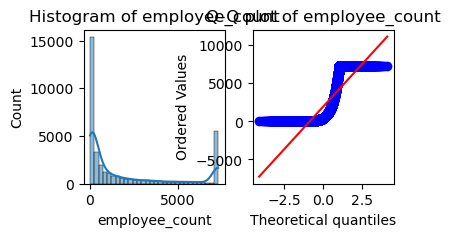

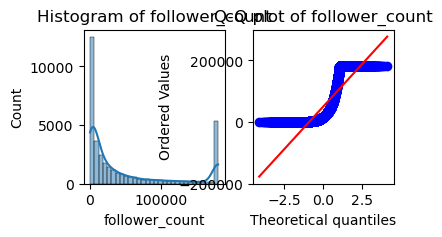

In [30]:
numeric_colls=['employee_count','follower_count']
for col in numeric_colls:
    plt.figure(figsize=(4,2))
    
    plt.subplot(1,2,1)
    sns.histplot(employee_counts[col],kde=True,bins=30)
    plt.title(f"Histogram of {col}")

    plt.subplot(1,2,2)
    stats.probplot(employee_counts[col].dropna(), dist="norm" , plot=plt)
    plt.title(f"Q-Q plot of {col}")

    plt.show()

In [31]:
#We capped outliers to limit extreme values, then applied log
#transformation to reduce skew. The resulting distribution is now
#suitable for visualization and modeling

In [32]:
##handle duplicate if exists
employee_counts.duplicated().sum()

65

In [33]:
## Remove duplicates
employee_counts.drop_duplicates(inplace=True)


In [34]:
## check again
employee_counts.duplicated().sum()

0

In [35]:
## now go to next
industries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   industry_id    422 non-null    int64 
 1   industry_name  388 non-null    object
dtypes: int64(1), object(1)
memory usage: 6.7+ KB


In [36]:
## there is no numeric col so we don't need to apply normality and outliers detection

In [37]:
##fill the null value
industries['industry_name'].fillna('Unknown', inplace=True)

In [38]:
industries.isnull().sum()

industry_id      0
industry_name    0
dtype: int64

In [39]:
## handle duplicate if exists
industries.duplicated().sum()

0

In [40]:
#The industry_name column had 34 missing values. Since it’s categorical, we
#filled the missing entries with 'Unknown' to maintain data consistency for
#analysis and ETL

In [41]:
## next table(job_industries)
job_industries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164808 entries, 0 to 164807
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   job_id       164808 non-null  int64
 1   industry_id  164808 non-null  int64
dtypes: int64(2)
memory usage: 2.5 MB


In [42]:
## both are id and there is no null value

In [43]:
#next table(job_skills)
job_skills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213768 entries, 0 to 213767
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   job_id     213768 non-null  int64 
 1   skill_abr  213768 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.3+ MB


In [44]:
# next table(postings)
postings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   company_name                122130 non-null  object 
 2   title                       123849 non-null  object 
 3   description                 123842 non-null  object 
 4   max_salary                  29793 non-null   float64
 5   pay_period                  36073 non-null   object 
 6   location                    123849 non-null  object 
 7   company_id                  122132 non-null  float64
 8   views                       122160 non-null  float64
 9   med_salary                  6280 non-null    float64
 10  min_salary                  29793 non-null   float64
 11  formatted_work_type         123849 non-null  object 
 12  applies                     23320 non-null   float64
 13  original_liste

In [45]:
#Handling missing values

In [46]:
###for categorical
cat_cols = ['company_name', 'pay_period', 'formatted_experience_level', 'skills_desc', 
            'posting_domain', 'currency', 'compensation_type']

for col in cat_cols:
    postings[col].fillna('Unknown', inplace=True)


In [47]:
#for numeric
num_cols_zero = ['views', 'applies', 'remote_allowed']
for col in num_cols_zero:
    postings[col].fillna(0, inplace=True)

# Median for salary columns
salary_cols = ['max_salary','med_salary','min_salary','normalized_salary']
for col in salary_cols:
    postings[col].fillna(postings[col].median(), inplace=True)


In [48]:
## i have decided to drop one col (skillS_desc-----because it has so many missing valuse  )

postings.drop('skills_desc', axis=1, inplace=True)

In [49]:
'''The postings table had many missing values. Categorical missing values
   were filled with 'Unknown', numerical missing values were filled with 0 or
   median, and columns with extremely sparse data like skills_desc can be
   dropped to maintain data quality for ETL and dashboarding'''

"The postings table had many missing values. Categorical missing values\n   were filled with 'Unknown', numerical missing values were filled with 0 or\n   median, and columns with extremely sparse data like skills_desc can be\n   dropped to maintain data quality for ETL and dashboarding"

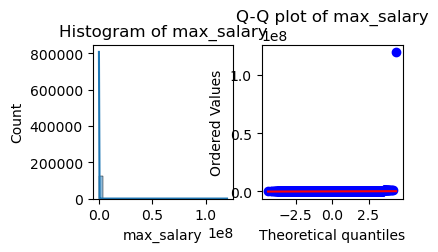

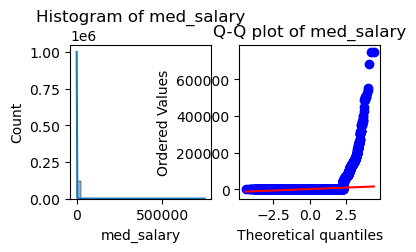

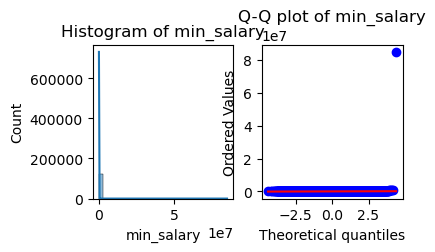

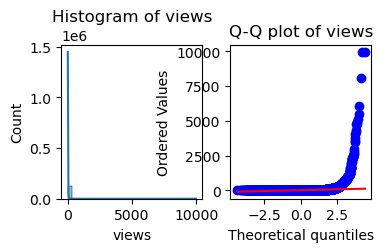

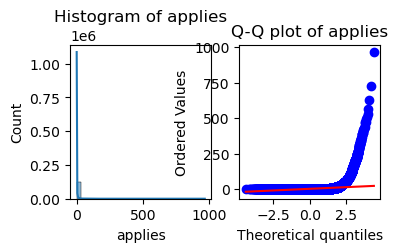

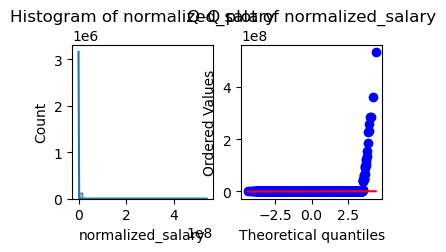

In [50]:
## Normality check 
num_cols = ['max_salary','med_salary','min_salary','views','applies','normalized_salary']
for col in num_cols:
    plt.figure(figsize=(4,2))
    
    plt.subplot(1,2,1)
    sns.histplot(postings[col],kde=True,bins=30)
    plt.title(f"Histogram of {col}")

    plt.subplot(1,2,2)
    stats.probplot(postings[col].dropna(), dist="norm" , plot=plt)
    plt.title(f"Q-Q plot of {col}")

    plt.show()

In [51]:
postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   company_name                123849 non-null  object 
 2   title                       123849 non-null  object 
 3   description                 123842 non-null  object 
 4   max_salary                  123849 non-null  float64
 5   pay_period                  123849 non-null  object 
 6   location                    123849 non-null  object 
 7   company_id                  122132 non-null  float64
 8   views                       123849 non-null  float64
 9   med_salary                  123849 non-null  float64
 10  min_salary                  123849 non-null  float64
 11  formatted_work_type         123849 non-null  object 
 12  applies                     123849 non-null  float64
 13  original_liste

In [52]:
####outlier detection
for col in num_cols:
    Q1=postings[col].quantile(0.25)
    Q3=postings[col].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper= Q3 + 1.5*IQR
    outliers=postings[(postings[col]<lower) | (postings[col]>upper)]
    print(f"{col}:{len(outliers)} outliers")

max_salary:29304 outliers
med_salary:6272 outliers
min_salary:29117 outliers
views:18814 outliers
applies:23320 outliers
normalized_salary:36062 outliers


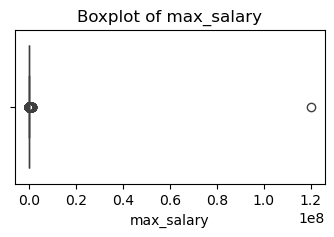

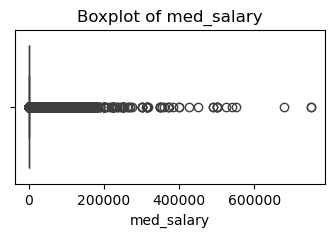

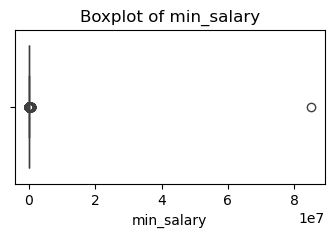

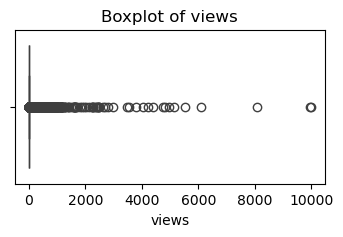

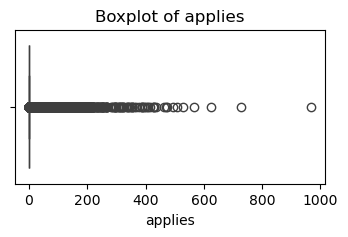

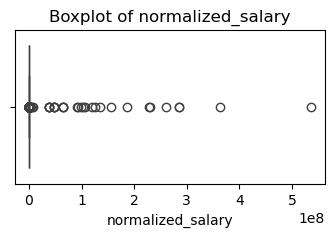

In [53]:
###outliers visualization
for col in num_cols:
    plt.figure(figsize=(4,2))
    sns.boxplot(x=postings[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [54]:
#Most numeric features are highly right-skewed due to a small number of extreme
#outliers, which is why the median is much lower than the mean. These outliers
#need to be handled (e.g., via IQR capping or log transformation) before further
#statistical analysis or modeling

In [55]:
### capping via IQR Method
for col in num_cols:
    Q1=postings[col].quantile(0.25)
    Q3=postings[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1 - 1.5*IQR
    upper=Q3 - 1.5*IQR
    postings[col]=np.where(postings[col]<lower,lower,postings[col])
    postings[col]=np.where(postings[col]>upper,upper,postings[col])

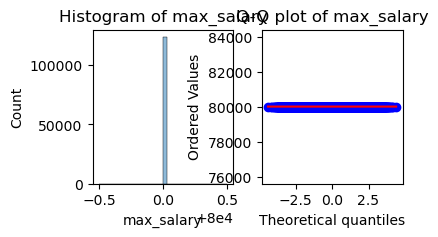

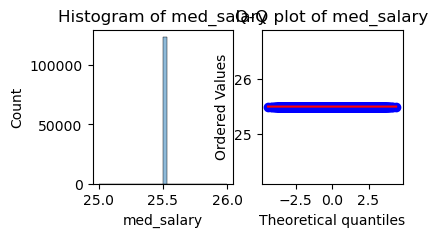

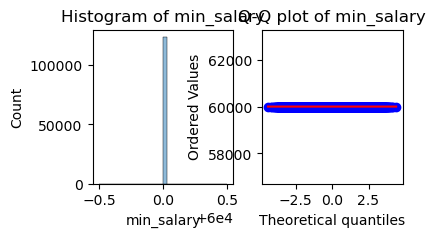

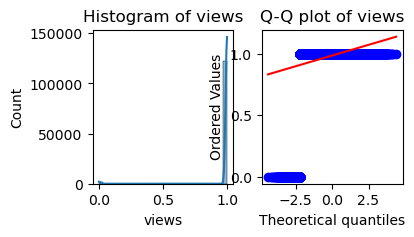

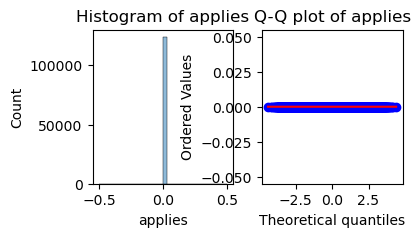

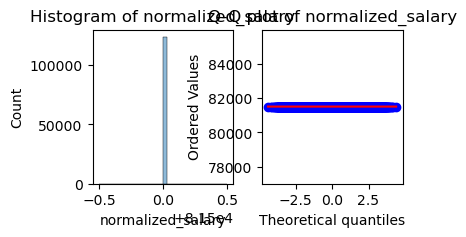

In [56]:
## Normality check 
num_cols = ['max_salary','med_salary','min_salary','views','applies','normalized_salary']
for col in num_cols:
    plt.figure(figsize=(4,2))
    
    plt.subplot(1,2,1)
    sns.histplot(postings[col],kde=True,bins=30)
    plt.title(f"Histogram of {col}")

    plt.subplot(1,2,2)
    stats.probplot(postings[col].dropna(), dist="norm" , plot=plt)
    plt.title(f"Q-Q plot of {col}")

    plt.show()
    

In [57]:
"""The postings table has 123,849 job listings with details like company, salary,
location, views, and applications. Missing values were filled and numeric outliers
capped using the IQR method, as most columns were highly right-skewed. The
views variable showed a discrete, bimodal pattern,
and the cleaned data isready for MySQL storage and Power BI dashboard visualization."""

'The postings table has 123,849 job listings with details like company, salary,\nlocation, views, and applications. Missing values were filled and numeric outliers\ncapped using the IQR method, as most columns were highly right-skewed. The\nviews variable showed a discrete, bimodal pattern,\nand the cleaned data isready for MySQL storage and Power BI dashboard visualization.'

In [58]:
# next table(benefits)
benefits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67943 entries, 0 to 67942
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   job_id    67943 non-null  int64 
 1   inferred  67943 non-null  int64 
 2   type      67943 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.6+ MB


In [59]:
"""The table contains 67,943 entries with three columns: job_id (int), inferred
(binary 0/1), and type (categorical). All columns have no missing values. Since
inferred is binary and type is categorical, normality and outlier analysis are
not applicable"""

'The table contains 67,943 entries with three columns: job_id (int), inferred\n(binary 0/1), and type (categorical). All columns have no missing values. Since\ninferred is binary and type is categorical, normality and outlier analysis are\nnot applicable'

In [60]:
## next table (salaries)
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40785 entries, 0 to 40784
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   salary_id          40785 non-null  int64  
 1   job_id             40785 non-null  int64  
 2   max_salary         33947 non-null  float64
 3   med_salary         6838 non-null   float64
 4   min_salary         33947 non-null  float64
 5   pay_period         40785 non-null  object 
 6   currency           40785 non-null  object 
 7   compensation_type  40785 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 2.5+ MB


In [61]:
### Handle missing value

In [62]:
# Fill missing numeric values with median
for col in ['max_salary', 'med_salary', 'min_salary']:
    salaries[col].fillna(salaries[col].median(), inplace=True)

In [63]:
# Check missing values
print(salaries.isnull().sum())

salary_id            0
job_id               0
max_salary           0
med_salary           0
min_salary           0
pay_period           0
currency             0
compensation_type    0
dtype: int64


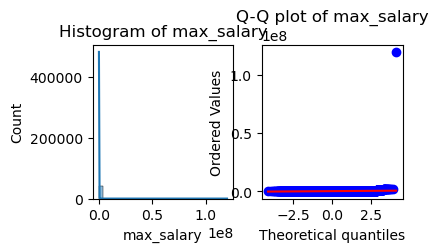

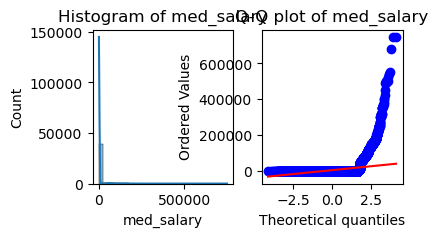

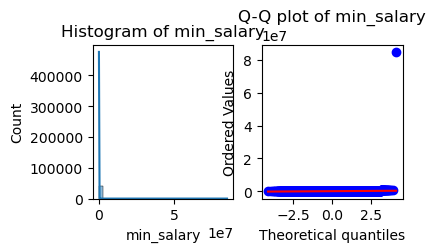

In [64]:
numeric_cols=['max_salary', 'med_salary', 'min_salary']
for col in numeric_cols:
    plt.figure(figsize=(4,2))
    
    plt.subplot(1,2,1)
    sns.histplot(salaries[col],kde=True,bins=30)
    plt.title(f"Histogram of {col}")

    plt.subplot(1,2,2)
    stats.probplot(salaries[col].dropna(), dist="norm" , plot=plt)
    plt.title(f"Q-Q plot of {col}")

    plt.show()

In [65]:
###Outlier Detection via IQR Method
for col in numeric_cols:
    Q1=salaries[col].quantile(0.25)
    Q3=salaries[col].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper= Q3 + 1.5*IQR
    outliers=salaries[(salaries[col]<lower) | (salaries[col]>upper)]
    print(f"{col}:{len(outliers)} outliers")

max_salary:872 outliers
med_salary:6647 outliers
min_salary:451 outliers


In [66]:
### we should to cap it via iqr
for col in numeric_cols:
    Q1=salaries[col].quantile(0.25)
    Q3=salaries[col].quantile(0.75)
    IQR=Q3-Q1
    lower= Q1 - 1.5*IQR
    upper= Q3 + 1.5*IQR
    salaries[col]=np.where(salaries[col]<lower,lower,salaries[col])
    salaries[col]=np.where(salaries[col]>upper,upper,salaries[col])

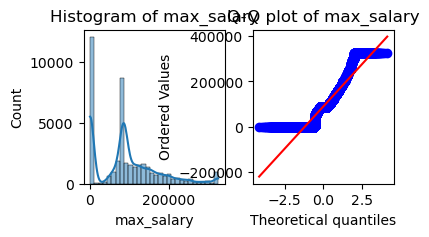

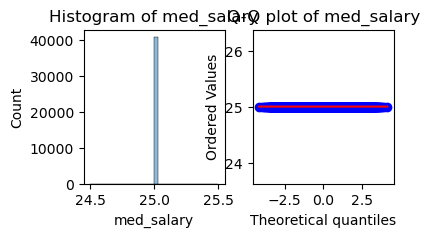

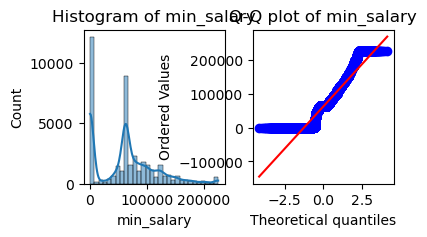

In [67]:
numeric_cols=['max_salary', 'med_salary', 'min_salary']
for col in numeric_cols:
    plt.figure(figsize=(4,2))
    
    plt.subplot(1,2,1)
    sns.histplot(salaries[col],kde=True,bins=30)
    plt.title(f"Histogram of {col}")

    plt.subplot(1,2,2)
    stats.probplot(salaries[col].dropna(), dist="norm" , plot=plt)
    plt.title(f"Q-Q plot of {col}")

    plt.show()

In [68]:
"""The Salary table contains 40,785 records with details of job salaries, pay period,
currency, and compensation type. Missing values in salary fields were handled
appropriately, and IQR-based capping was applied to treat outliers. The normality
tests revealed strong right-skewness in salary variables due to a few extremely high
values. After preprocessing, the dataset was cleaned and standardized for further
use in MySQL integration and Power BI visualization"""

'The Salary table contains 40,785 records with details of job salaries, pay period,\ncurrency, and compensation type. Missing values in salary fields were handled\nappropriately, and IQR-based capping was applied to treat outliers. The normality\ntests revealed strong right-skewness in salary variables due to a few extremely high\nvalues. After preprocessing, the dataset was cleaned and standardized for further\nuse in MySQL integration and Power BI visualization'

### Export Cleaned data in the csv file

In [69]:
companies.to_csv(r"C:\Users\Asus\OneDrive\Desktop\LinkedIn Job Insights (2023–24)_project(mysql,etl,power bi)\data\cleaned_data\companies_cleaned.csv",index=False)
company_industry.to_csv(r"C:\Users\Asus\OneDrive\Desktop\LinkedIn Job Insights (2023–24)_project(mysql,etl,power bi)\data\cleaned_data\company_industry_cleaned.csv",index=False)
company_specialities.to_csv(r"C:\Users\Asus\OneDrive\Desktop\LinkedIn Job Insights (2023–24)_project(mysql,etl,power bi)\data\cleaned_data\company_specialities_cleaned.csv",index=False)
employee_counts.to_csv(r"C:\Users\Asus\OneDrive\Desktop\LinkedIn Job Insights (2023–24)_project(mysql,etl,power bi)\data\cleaned_data\employee_count_cleaned.csv",index=False)
industries.to_csv(r"C:\Users\Asus\OneDrive\Desktop\LinkedIn Job Insights (2023–24)_project(mysql,etl,power bi)\data\cleaned_data\industries_cleaned.csv",index=False)
job_industries.to_csv(r"C:\Users\Asus\OneDrive\Desktop\LinkedIn Job Insights (2023–24)_project(mysql,etl,power bi)\data\cleaned_data\job_industries_cleaned.csv",index=False)
job_skills.to_csv(r"C:\Users\Asus\OneDrive\Desktop\LinkedIn Job Insights (2023–24)_project(mysql,etl,power bi)\data\cleaned_data\job_skills_cleaned.csv",index=False)
postings.to_csv(r"C:\Users\Asus\OneDrive\Desktop\LinkedIn Job Insights (2023–24)_project(mysql,etl,power bi)\data\cleaned_data\postings_cleaned.csv",index=False)
salaries.to_csv(r"C:\Users\Asus\OneDrive\Desktop\LinkedIn Job Insights (2023–24)_project(mysql,etl,power bi)\data\cleaned_data\salaries_cleaned.csv",index=False)
benefits.to_csv(r"C:\Users\Asus\OneDrive\Desktop\LinkedIn Job Insights (2023–24)_project(mysql,etl,power bi)\data\cleaned_data\benefits_cleaned.csv",index=False)

#### Data is imported in mysql

In [1]:
import pandas as pd
import mysql.connector

In [71]:
#### cleaned file path(for companies)
df=pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\LinkedIn Job Insights (2023–24)_project(mysql,etl,power bi)\data\cleaned_data\companies_cleaned.csv")

In [96]:
###connect to mysql
conn=mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="@priya123#ni56",
    database="linkdin_jobs"
)

conn.autocommit = True

cursor = conn.cursor()

In [97]:
print(df.columns)

Index(['company_id', 'name', 'description', 'company_size', 'state', 'country', 'city', 'zip_code', 'address', 'url'], dtype='object')


In [98]:
df.rename(columns={
    'company_id':'company_id',
    'name':'name',
    'description':'description',
    'company_size':'company_size',
    'state':'state',
    'country':'country',
    'city':'city',
    'zip_code':'zip_code',
    'address':'address',
    'url':'url'
}, inplace=True)

In [99]:
print(df.head())

   company_id                        name                                        description  company_size  state country              city zip_code                                address                                                url
0        1009                         IBM  At IBM, we do more than work. We create. We cr...           7.0     NY      US  Armonk, New York    10504  International Business Machines Corp.               https://www.linkedin.com/company/ibm
1        1016               GE HealthCare  Every day millions of people feel the impact o...           7.0      0      US           Chicago        0                                      -      https://www.linkedin.com/company/gehealthcare
2        1025  Hewlett Packard Enterprise  Official LinkedIn of Hewlett Packard Enterpris...           7.0  Texas      US           Houston    77389            1701 E Mossy Oaks Rd Spring  https://www.linkedin.com/company/hewlett-packa...
3        1028                      Oracle  W

In [100]:
#### Insert data (companies)
for i, row in df.iterrows():
    cursor.execute("""
        INSERT INTO companies (company_id, name, description, company_size, state, country, city, zip_code, address, url)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
        ON DUPLICATE KEY UPDATE
            name = VALUES(name),
            description = VALUES(description),
            company_size = VALUES(company_size),
            state = VALUES(state),
            country = VALUES(country),
            city = VALUES(city),
            zip_code = VALUES(zip_code),
            address = VALUES(address),
            url = VALUES(url)
    """, (
        row['company_id'],
        row['name'],
        row['description'],
        row['company_size'],
        row['state'],
        row['country'],
        row['city'],
        row['zip_code'],
        row['address'],
        row['url']
    ))

conn.commit()
print("Data imported successfully!")
cursor.close()
conn.close()


Data imported successfully!


In [78]:
#### Insert data into (company_industry)
df1=pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\LinkedIn Job Insights (2023–24)_project(mysql,etl,power bi)\data\cleaned_data\company_industry_cleaned.csv")

In [79]:
df1.columns

Index(['company_id', 'industry'], dtype='object')

In [80]:
df1.rename(columns={
    'company_id':'company_id',
    'industry':'industry'

}, inplace=True)

In [81]:
df1.head()

,company_id,industry
0,391906,Book and Periodical Publishing
1,22292832,Construction
2,20300,Banking
3,3570660,Book and Periodical Publishing
4,878353,Staffing and Recruiting


In [82]:
###connect to mysql
conn=mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="@priya123#ni56",
    database="linkdin_jobs"
)
cursor = conn.cursor()

In [83]:
#### Insert data (company_industry)
for i,row in df1.iterrows():
    cursor.execute("""
         INSERT INTO company_industry (company_id,industry)
         VALUES (%s,%s)
    """,(
        row['company_id'],
        row['industry'],

    ))
        
conn.commit()
print("Data imported succesfully!")
cursor.close()
conn.close()

Data imported succesfully!


In [84]:
#### Insert data into (company_specialities)
df2=pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\LinkedIn Job Insights (2023–24)_project(mysql,etl,power bi)\data\cleaned_data\company_specialities_cleaned.csv")

In [85]:
df2.columns

Index(['company_id', 'speciality'], dtype='object')

In [86]:
df2.rename(columns={
    'company_id':'company_id',
    'speciality':'speciality'
}, inplace=True)

In [87]:
df2.head()

,company_id,speciality
0,22292832,window replacement
1,22292832,patio door replacement
2,20300,Commercial Banking
3,20300,Retail Banking
4,20300,Mortgage


In [88]:
###connect to mysql
conn=mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="@priya123#ni56",
    database="linkdin_jobs"
)
cursor = conn.cursor()

In [89]:
#### Insert data (company_specialities)
for i,row in df2.iterrows():
    cursor.execute("""
         INSERT INTO company_specialities (company_id,speciality)
         VALUES (%s,%s)
    """,(
        row['company_id'],
        row['speciality'],

    ))
        
conn.commit()
print("Data imported succesfully!")
cursor.close()
conn.close()

Data imported succesfully!


In [ ]:
##onsert data into(employee_counts)
df3=pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\LinkedIn Job Insights (2023–24)_project(mysql,etl,power bi)\data\cleaned_data\employee_count_cleaned.csv")

In [ ]:
df3.columns

In [ ]:
df3.rename(columns={
    'company_id':'company_id',
    'employee_count':'employee_count',
    'follower_count':'follower_count',
    'time_recorded':'time_recorded',
    'log_employee_count':'log_employee_count',
    'log_follower_count':'log_follower_count'
}, inplace=True)

In [ ]:
df3.head()

In [8]:
###connect to mysql
conn=mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="@priya123#ni56",
    database="linkdin_jobs"
)
cursor = conn.cursor()

In [9]:
#### Insert data (employee_counts)
for i,row in df3.iterrows():
    cursor.execute("""
         INSERT INTO employee_counts (company_id,employee_count,follower_count,time_recorded,log_employee_count,log_follower_count)
         VALUES (%s,%s,%s,%s,%s,%s)
    """,(
        row['company_id'],
        row['employee_count'],
        row['follower_count'],
        row['time_recorded'],
        row['log_employee_count'],
        row['log_follower_count']
    ))
        
conn.commit()
print("Data imported succesfully!")
cursor.close()
conn.close()

Data imported succesfully!


In [10]:
#### Insert data into (industries)
df4=pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\LinkedIn Job Insights (2023–24)_project(mysql,etl,power bi)\data\cleaned_data\industries_cleaned.csv")

In [11]:
df4.columns

Index(['industry_id', 'industry_name'], dtype='object')

In [12]:
df4.rename(columns={
    'industry_id':'industry_id',
    'industry_name':'industry_name'

}, inplace=True)

In [13]:
df4.head()

,industry_id,industry_name
0,1,Defense and Space Manufacturing
1,3,Computer Hardware Manufacturing
2,4,Software Development
3,5,Computer Networking Products
4,6,"Technology, Information and Internet"


In [14]:
###connect to mysql
conn=mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="@priya123#ni56",
    database="linkdin_jobs"
)
cursor = conn.cursor()

In [15]:
#### Insert data (industries)
for i,row in df4.iterrows():
    cursor.execute("""
         INSERT INTO industries (industry_id,industry_name)
         VALUES (%s,%s)
    """,(
        row['industry_id'],
        row['industry_name'],
    ))
        
conn.commit()
print("Data imported succesfully!")
cursor.close()
conn.close()

Data imported succesfully!


In [3]:
##insert into(job_industries)
df5=pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\LinkedIn Job Insights (2023–24)_project(mysql,etl,power bi)\data\cleaned_data\job_industries_cleaned.csv")

In [4]:
df5.columns

Index(['job_id', 'industry_id'], dtype='object')

In [5]:
df5.rename(columns={
    'job_id':'job_id',
    'industry_id':'industry_id'

}, inplace=True)

In [11]:
###connect to mysql
conn=mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="@priya123#ni56",
    database="linkdin_jobs",
    ssl_disabled=True
)
cursor = conn.cursor()

In [12]:
print(conn.is_connected()) 

True


In [13]:
#### Insert data (job_industries)
for i,row in df5.iterrows():
    cursor.execute("""
         INSERT INTO job_industries (job_id,industry_id)
         VALUES (%s,%s)
    """,(
        int(row['job_id']),
        int(row['industry_id']),
    ))
        
conn.commit()
print("Data imported succesfully!")
cursor.close()
conn.close()

Data imported succesfully!


In [15]:
###Now insert data into (job_skills)
df6=pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\LinkedIn Job Insights (2023–24)_project(mysql,etl,power bi)\data\cleaned_data\job_skills_cleaned.csv")

In [16]:
df6.columns

Index(['job_id', 'skill_abr'], dtype='object')

In [17]:
df6.rename(columns={
    'job_id':'job_id',
    'skill_abr':'skill_abr'

}, inplace=True)

In [18]:
df6.head()

,job_id,skill_abr
0,3884428798,MRKT
1,3884428798,PR
2,3884428798,WRT
3,3887473071,SALE
4,3887465684,FIN


In [19]:
###connect to mysql
conn=mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="@priya123#ni56",
    database="linkdin_jobs"
)
cursor = conn.cursor()

In [20]:
#### Insert data (job_skills)
for i,row in df6.iterrows():
    cursor.execute("""
         INSERT INTO job_skills (job_id,skill_abr)
         VALUES (%s,%s)
    """,(
        row['job_id'],
        row['skill_abr'],
 
    ))
        
conn.commit()
print("Data imported succesfully!")
cursor.close()
conn.close()

Data imported succesfully!


In [22]:
####insert data into(postings)
df7=pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\LinkedIn Job Insights (2023–24)_project(mysql,etl,power bi)\data\cleaned_data\postings_cleaned.csv")

In [23]:
df7.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'listed_time', 'posting_domain',
       'sponsored', 'work_type', 'currency', 'compensation_type',
       'normalized_salary', 'zip_code', 'fips'],
      dtype='object')

In [24]:
df7.rename(columns={
    'job_id':'job_id',
    'company_name':'company_name',
    'title':'title',
    'description':'description',
    'max_salary':'max_salary',
    'pay_period':'pay_period',
    'location':'location',
    'company_id':'company_id',
    'views':'views',
    'med_salary':'med_salary',
    'min_salary':'min_salary',
    'formatted_work_type':'formatted_work_type',
    'applies':'applies',
    'original_listed_time':'original_listed_time',
    'remote_allowed':'remote_allowed',
    'job_posting_url':'job_posting_url',
    'application_url':'application_url',
    'application_type':'application_type',
    'expiry':'expiry',
    'closed_time':'closed_time',
    'formatted_experience_level':'formatted_experience_level',
    'listed_time':'listed_time',
    'posting_domain':'posting_domain',
    'sponsored':'sponsored',
    'work_type':'work_type',
    'currency':'currency',
    'compensation_type':'compensation_type',
    'normalized_salary':'normalized_salary',
    'zip_code':'zip_code',
    'fips':'fips'

},inplace=True)

In [25]:
df7.head()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,formatted_experience_level,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,80000.0,HOURLY,"Princeton, NJ",2774458.0,1.0,25.5,...,Unknown,1.713398e+12,Unknown,0,FULL_TIME,USD,BASE_SALARY,81500.0,8540.0,34021.0
1,1829192,Unknown,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",80000.0,HOURLY,"Fort Collins, CO",NaN,1.0,25.5,...,Unknown,1.712858e+12,Unknown,0,FULL_TIME,USD,BASE_SALARY,81500.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,80000.0,YEARLY,"Cincinnati, OH",64896719.0,1.0,25.5,...,Unknown,1.713278e+12,Unknown,0,FULL_TIME,USD,BASE_SALARY,81500.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,80000.0,YEARLY,"New Hyde Park, NY",766262.0,1.0,25.5,...,Unknown,1.712896e+12,Unknown,0,FULL_TIME,USD,BASE_SALARY,81500.0,11040.0,36059.0
4,35982263,Unknown,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,1.0,25.5,...,Unknown,1.713452e+12,Unknown,0,FULL_TIME,USD,BASE_SALARY,81500.0,52601.0,19057.0


In [26]:
###connect to mysql
conn=mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="@priya123#ni56",
    database="linkdin_jobs"
)
cursor = conn.cursor()

In [29]:
#### Insert data (postings)
for i,row in df7.iterrows():
    cursor.execute("""
         INSERT IGNORE INTO postings (job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,min_salary,formatted_work_type,applies,original_listed_time,remote_allowed,job_posting_url,application_url,application_type,expiry,closed_time,formatted_experience_level,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips)
         VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)
    """,(
        row['job_id'],
        row['company_name'],
        row['title'],
        row['description'],
        row['max_salary'],
        row['pay_period'],
        row['location'],
        row['company_id'],
        row['views'],
        row['med_salary'],
        row['min_salary'],
        row['formatted_work_type'],
        row['applies'],
        row['original_listed_time'],
        row['remote_allowed'],
        row['job_posting_url'],
        row['application_url'],
        row['application_type'],
        row['expiry'],
        row['closed_time'],
        row['formatted_experience_level'],
        row['listed_time'],
        row['posting_domain'],
        row['sponsored'],
        row['work_type'],
        row['currency'],
        row['compensation_type'],
        row['normalized_salary'],
        row['zip_code'],
        row['fips']      
    ))
        
conn.commit()
print("Data imported succesfully!")
cursor.close()
conn.close()

Data imported succesfully!


In [31]:
###Insert into(salaries)
df8=pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\LinkedIn Job Insights (2023–24)_project(mysql,etl,power bi)\data\cleaned_data\salaries_cleaned.csv")

In [32]:
df8.columns

Index(['salary_id', 'job_id', 'max_salary', 'med_salary', 'min_salary',
       'pay_period', 'currency', 'compensation_type'],
      dtype='object')

In [33]:
df8.rename(columns={
    'salary_id':'salary_id',
    'job_id':'job_id',
    'max_salary':'max_salary',
    'med_salary':'med_salary',
    'min_salary':'min_salary',
    'pay_period':'pay_period',
    'currency':'currency',
    'compensation_type':'compensation_type'

}, inplace=True)

In [34]:
###connect to mysql
conn=mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="@priya123#ni56",
    database="linkdin_jobs"
)
cursor = conn.cursor()

In [35]:
df8.head()

,salary_id,job_id,max_salary,med_salary,min_salary,pay_period,currency,compensation_type
0,1,3884428798,85000.0,25.0,62300.0,HOURLY,USD,BASE_SALARY
1,2,3887470552,25.0,25.0,23.0,HOURLY,USD,BASE_SALARY
2,3,3884431523,120000.0,25.0,100000.0,YEARLY,USD,BASE_SALARY
3,4,3884911725,200000.0,25.0,10000.0,YEARLY,USD,BASE_SALARY
4,5,3887473220,35.0,25.0,33.0,HOURLY,USD,BASE_SALARY


In [39]:
#### Insert data (salaries)
for i, row in df8.iterrows():
    cursor.execute("SELECT 1 FROM postings WHERE job_id=%s", (row['job_id'],))
    if cursor.fetchone():  # Exists
        cursor.execute("""
            INSERT IGNORE INTO salaries (salary_id, job_id, max_salary, med_salary, min_salary, pay_period, currency, compensation_type)
            VALUES (%s,%s,%s,%s,%s,%s,%s,%s)
        """, (
            row['salary_id'],
            row['job_id'],
            row['max_salary'],
            row['med_salary'],
            row['min_salary'],
            row['pay_period'],
            row['currency'],
            row['compensation_type']
        ))
conn.commit()
print("Data imported succesfully!")
cursor.close()
conn.close()

Data imported succesfully!


In [3]:
## NOw the last table(benefits)
df9=pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\LinkedIn Job Insights (2023–24)_project(mysql,etl,power bi)\data\cleaned_data\benefits_cleaned.csv")

In [4]:
df9.columns

Index(['job_id', 'inferred', 'type'], dtype='object')

In [5]:
df9.rename(columns={
    'job_id':'job_id',
    'inferred':'inferred',
    'type':'type'

}, inplace=True)

In [6]:
df9.head()

,job_id,inferred,type
0,3887473071,0,Medical insurance
1,3887473071,0,Vision insurance
2,3887473071,0,Dental insurance
3,3887473071,0,401(k)
4,3887473071,0,Student loan assistance


In [7]:
###connect to mysql
conn=mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="@priya123#ni56",
    database="linkdin_jobs"
)
cursor = conn.cursor()

In [8]:
#### Insert data (benefits)
for i,row in df9.iterrows():
    cursor.execute("""
         INSERT INTO benefits (job_id,inferred,type)
         VALUES (%s,%s,%s)
    """,(
        row['job_id'],
        row['inferred'],
        row['type'],
    ))
        
conn.commit()
print("Data imported succesfully!")
cursor.close()
conn.close()

Data imported succesfully!


In [ ]:
##### Now successfully evry tables inserted 